In [4]:
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,6 mins 14 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_maravenag_3wzuvj
H2O cluster total nodes:,1
H2O cluster free memory:,3.267 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [5]:
data = h2o.upload_file("cereal.csv", destination_frame="train")
data = data.drop("name")
data['mfr'] = data['mfr'].asfactor()
data['type'] = data['type'].asfactor()
target = "rating"
train = data
train_cols = [x for x in train.col_names if x not in ['rating']]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

param = {
      "ntrees" : 500
    , "max_depth" : 5
    , "learn_rate" : 0.01
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
    , "nfolds": 4
    }

model = H2OGradientBoostingEstimator(**param)
model.train(x=train_cols,y=target,training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


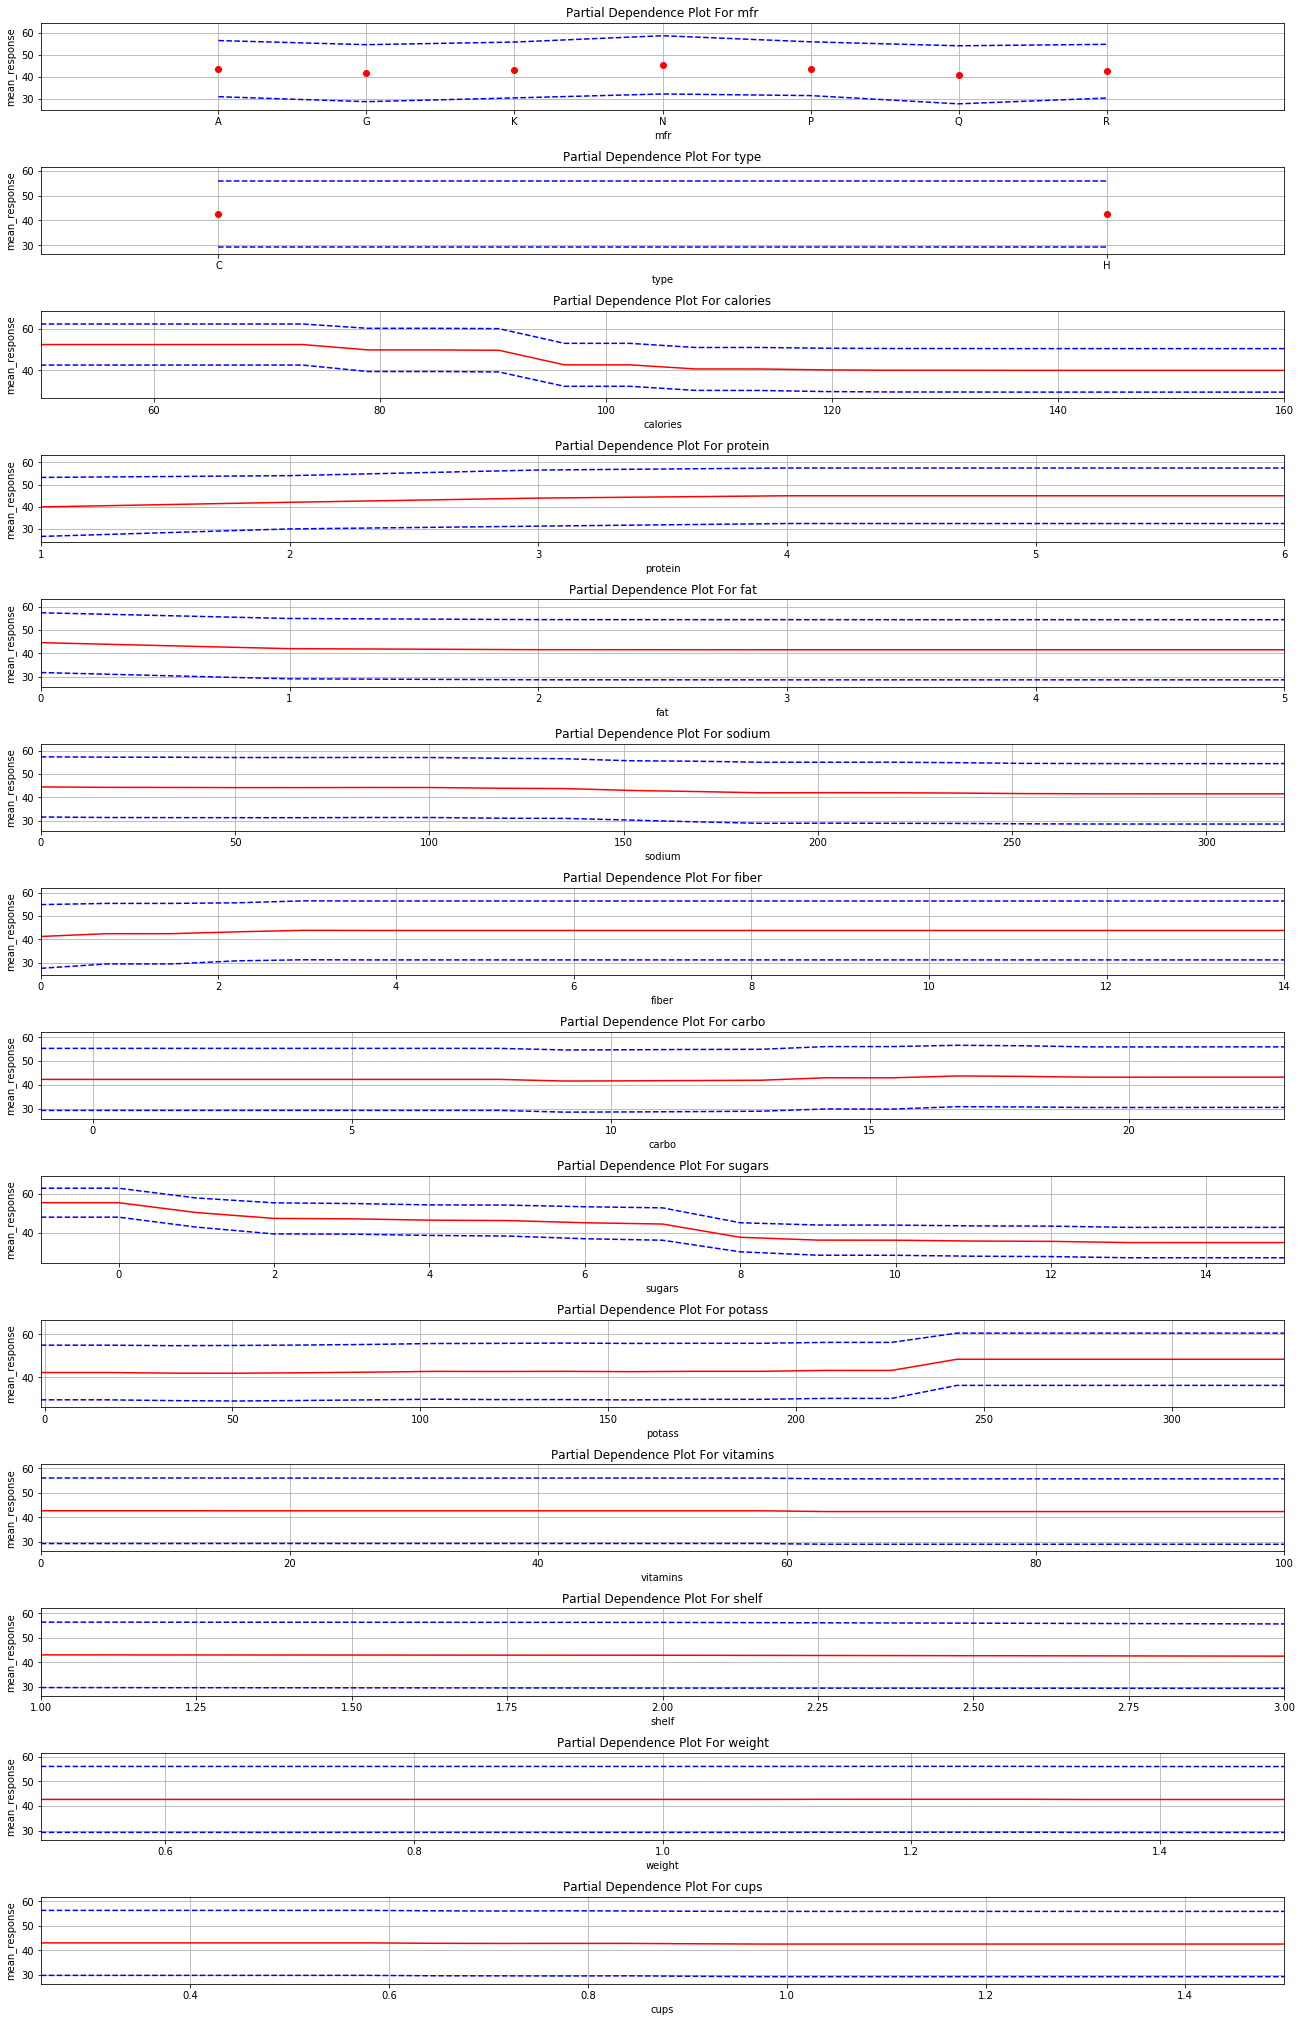

In [17]:
p = model.partial_plot(train, cols=train_cols, figsize=(18, 28), plot=True)